notebook for building example network

In [1]:
from bmtk.builder import NetworkBuilder
from bmtk.builder.auxi.node_params import positions_cuboid
from bmtool.connectors  import UnidirectionConnector, ReciprocalConnector, OneToOneSequentialConnector
import numpy as np

net = NetworkBuilder('example_net')
net.add_nodes(N=250, pop_name='PN',
              positions=positions_cuboid(250,min_dist=10),
              mem_potential='e',
              model_type='biophysical',
              model_template='hoc:Cell_Af',
              rotation_angle_zaxis=(np.pi/2), #90 degrees
              morphology=None)

net.add_nodes(N=50, pop_name='FSI',
              positions=positions_cuboid(50,min_dist=10),
              mem_potential='e',
              model_type='biophysical',
              model_template='hoc:InterneuronCellf',
              rotation_angle_zaxis=(np.pi/2), #90 degrees
              morphology=None)

background = NetworkBuilder('background')
background.add_nodes(N=300,
                   pop_name='tON',
                   potential='exc',
                   model_type='virtual')

connector = ReciprocalConnector(p0=0.10, pr=0.01, n_syn0=1, n_syn1=1,estimate_rho=False,verbose=False)
connector.setup_nodes(source=net.nodes(pop_name = 'PN'), target=net.nodes(pop_name = 'PN'))
net.add_edges(**connector.edge_params())

connector = ReciprocalConnector(p0=0.20, pr=0.14, n_syn0=1, n_syn1=1,estimate_rho=False,verbose=False)
connector.setup_nodes(source=net.nodes(pop_name = 'PN'), target=net.nodes(pop_name = 'FSI'))
net.add_edges(**connector.edge_params())

connector = ReciprocalConnector(p0=0.30, pr=0.06, n_syn0=1, n_syn1=1,estimate_rho=False,verbose=False)
connector.setup_nodes(source=net.nodes(pop_name = 'FSI'), target=net.nodes(pop_name = 'PN'))
net.add_edges(**connector.edge_params())

connector = ReciprocalConnector(p0=0.30, pr=0.06, n_syn0=1, n_syn1=1,estimate_rho=False,verbose=False)
connector.setup_nodes(source=net.nodes(pop_name = 'FSI'), target=net.nodes(pop_name = 'FSI'))
net.add_edges(**connector.edge_params())

connector = OneToOneSequentialConnector(verbose=False)
connector.setup_nodes(source=background.nodes(), target=net.nodes(pop_name = 'PN'))
net.add_edges(**connector.edge_params())
connector.setup_nodes(target=net.nodes(pop_name = 'FSI'))
net.add_edges(**connector.edge_params())

net.save('network/')
background.save('network/')

from bmtk.utils.sim_setup import build_env_bionet
build_env_bionet(base_dir='./',      
                 network_dir='network/',
                 tstop=3000.0, dt=0.1,
                 spikes_inputs=[('background',   # Name of population which spikes will be generated for
                                'background.h5')], # current this does not exist
                 include_examples=True,    # Copies components files
                 compile_mechanisms=False,   # Will try to compile NEURON mechanisms
                 config_file='config.json',
                 overwrite_config=True
                )



/Users/gregglickert/opt/anaconda3/envs/bmtk/lib/python3.8/site-packages/bmtool/bmplot.py:278: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


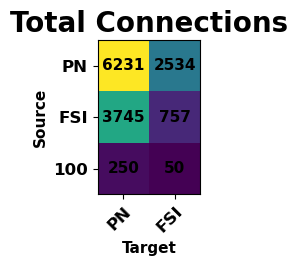

In [2]:
from bmtool import bmplot

bmplot.connection_matrix(config='config.json',sources='all',targets='all',sids='pop_name', tids='pop_name',no_prepend_pop=True)

/Users/gregglickert/opt/anaconda3/envs/bmtk/lib/python3.8/site-packages/bmtool/bmplot.py:278: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


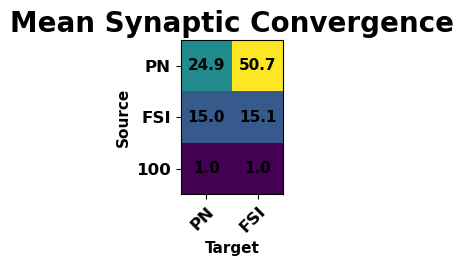

In [3]:
bmplot.convergence_connection_matrix(config='config.json',sources='all',targets='all',sids='pop_name', tids='pop_name',no_prepend_pop=True)

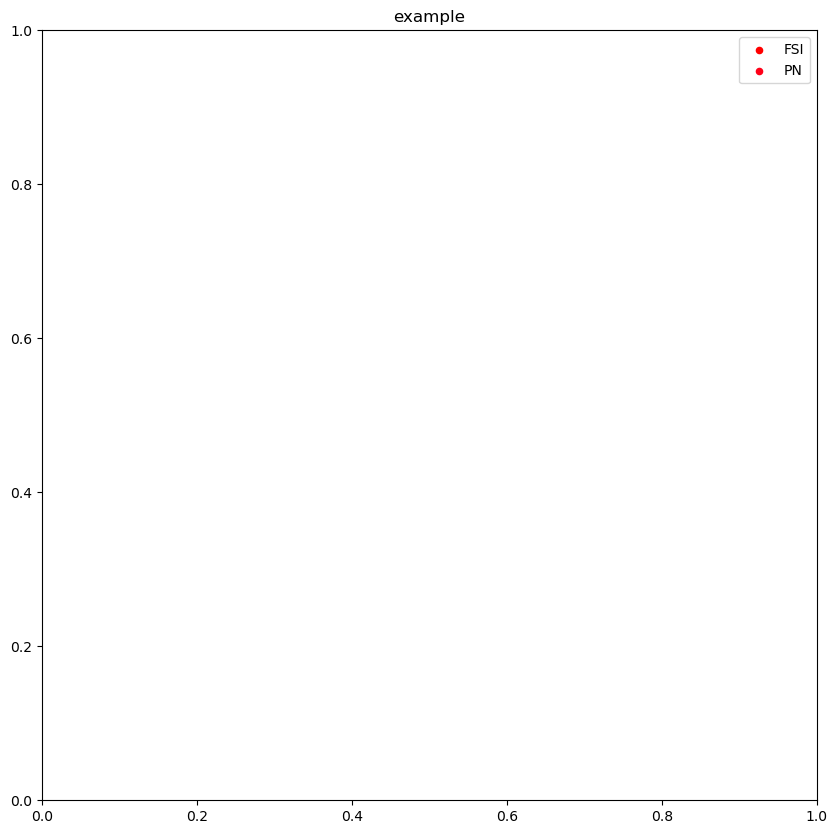

In [4]:
bmplot.plot_3d_positions(config='config.json',populations='all',group_by='pop_name',title='example',save_file=False)